# Monosynaptic pair analysis [Control vs TSC organoid dataset]
-------

Example notebook demonstrating simple functions in SynapticConn for analysing and plotting spike trains following single-unit spike-sorting in Kilosort2 and Phy2 using SpikeInterface.

In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('../..')
import synapticonn as synapticonn

Load spike times.

Here, we are loading a series of spike time trains exported from Kilosort 2 and Phy via the [SpikeInterface](https://github.com/SpikeInterface/spikeinterface) package. Additional file types can be used.

In [2]:
data_fpath = pathlib.Path('Y:', 'Projects', 'connectomics', 'monosynaptic_connections', 'spike_times', 'TC059.pkl')

# open pickle
spike_units = np.load(data_fpath, allow_pickle=True)

srate = spike_units['sampling_frequency']
spike_times_samples = spike_units['spike_times']

Find the start and end time.

In [3]:
slice_end_time = spike_units['slice_annotations']['slice_end_time']

if slice_end_time != 'unspecified':
    recording_length_ms = slice_end_time * 1000
else:
    recording_length_ms = spike_units['end_time'] * 1000
    
print(f"Recording length: {recording_length_ms} ms")
print(f'Start time: 0 seconds by default for all baseline recordings')
print(f'End time: {recording_length_ms / 1000} seconds')

Recording length: 1820160.0 ms
Start time: 0 seconds by default for all baseline recordings
End time: 1820.16 seconds


Initialize the object.

In [4]:
snc = synapticonn.SynaptiConn(spike_times_samples, bin_size_ms=1, max_lag_ms=100, srate=srate, recording_length_ms=recording_length_ms)

Check spiketime conversions.

Check the loaded spike units.

In [5]:
spk_unit_report = snc.report_spike_units()
pd.DataFrame(spk_unit_report)

,unit_id,n_spikes
0,2,2825
1,9,1860
2,10,1909
3,11,1831
4,13,839
5,20,3261
6,24,1831
7,29,2777
8,30,674
9,31,4278


## Spike isolation quality metrics
----

Prior to proceeding, it is important to cross-check the quality of the spike sorted neurons. 

Metrics related to the spike quality can be found below. Notably, the autocorrelograms for each unit should also be cross-referenced prior to continuing. Low contamination (or no contamination) in the refractory periods are important for correct assesments of spike-units and their monosynaptic connections.

**NOTE** here, more simple and core metric assessments are performed. In the future, these will be extended. For further quality metrics, please see the following [code](https://github.com/SpikeInterface/spikeinterface/blob/main/src/spikeinterface/qualitymetrics/misc_metrics.py#L1183). Further, Allen Brain have core documentation which can be found [here](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html#ISI-violations) explaining some key metrics to assess spike unit quality.

In [6]:
params = {'isi_threshold_ms': 1.5,
          'min_isi_ms': 0.3,  # note :: isi min should be based on the miniimum possible refractory period (e.g. spikes removed would constitute this)
          'presence_ratio_bin_duration_ms': 60*1000,
          'presence_ratio_mean_fr_ratio_thresh': 0.0}

qc = snc.spike_unit_quality(**params)
qc

,isi_violations_ratio,isi_violations_rate,isi_violations_count,isi_violations_of_total_spikes,presence_ratio,recording_length_sec,n_spikes,firing_rate_hz
2,5.511749,0.031865,58.0,0.020531,0.967742,1820.16,2825.0,1.552061
9,3.069025,0.007692,14.0,0.007527,0.967742,1820.16,1860.0,1.021888
10,7.283741,0.019229,35.0,0.018334,0.967742,1820.16,1909.0,1.048809
11,9.727250,0.023624,43.0,0.023484,0.967742,1820.16,1831.0,1.005956
13,8.619149,0.004395,8.0,0.009535,0.967742,1820.16,839.0,0.460948
20,0.000000,0.000000,0.0,0.000000,0.967742,1820.16,3261.0,1.791601
24,6.334023,0.015383,28.0,0.015292,0.967742,1820.16,1831.0,1.005956
29,8.260871,0.046150,84.0,0.030248,0.967742,1820.16,2777.0,1.525690
30,1.669470,0.000549,1.0,0.001484,0.967742,1820.16,674.0,0.370297
31,3.688135,0.048897,89.0,0.020804,0.967742,1820.16,4278.0,2.350343


Cross-check this against the QC outputs contained in the files themselves.

In [7]:
pd.DataFrame(spike_units['spike_features']).T

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,...,p_idx,pk_amp,a_amp,b_amp,a_amp_norm,b_amp_norm,assymetry,peak_amplitude_assymetry,assymetry_norm,peak_amplitude_assymetry_norm
2,2825.0,1.552061,1.0,3.302179,4.409399,58.0,1.0,13.0,NaN,0.000941,...,29.0,-10.501531,6.350761,2.014350,0.489302,0.106077,-4.336411,-0.518392,-0.383225,-0.643667
9,1860.0,1.021888,1.0,5.887759,2.455220,14.0,1.0,21.0,NaN,0.000881,...,29.0,-17.021948,5.581681,4.325879,0.313331,0.240366,-1.255802,-0.126752,-0.072965,-0.131779
10,1909.0,1.048809,1.0,3.046805,5.826993,35.0,1.0,19.0,NaN,0.001933,...,28.0,-8.808539,7.099559,1.267890,0.680787,0.064636,-5.831669,-0.696947,-0.616151,-0.826580
11,1832.0,1.006505,1.0,11.260340,7.954082,44.0,1.0,4.0,NaN,0.000328,...,29.0,-32.554478,6.933814,9.310076,0.237240,0.311693,2.376262,0.146287,0.074453,0.135632
13,840.0,0.461498,1.0,10.710896,7.738776,9.0,0.0,0.0,NaN,0.000597,...,29.0,-27.869394,3.928471,8.311680,0.201624,0.367263,4.383209,0.358101,0.165639,0.291163
20,3261.0,1.791601,1.0,19.561728,0.000000,0.0,1.0,56.0,0.03,0.003134,...,29.0,-45.243526,9.221154,9.884938,0.206788,0.221496,0.663784,0.034742,0.014708,0.034341
24,1833.0,1.007054,1.0,5.562696,5.417322,30.0,1.0,19.0,NaN,0.002466,...,29.0,-17.690386,6.716187,3.645330,0.268353,0.108768,-3.070857,-0.296371,-0.159585,-0.423168
29,2777.0,1.525690,1.0,3.381444,6.608697,84.0,1.0,43.0,NaN,0.000242,...,30.0,-8.798405,4.606290,2.391480,0.400400,0.169017,-2.214810,-0.316502,-0.231383,-0.406351
30,674.0,0.370297,1.0,14.297834,1.335576,1.0,1.0,68.0,NaN,0.001003,...,30.0,-37.202492,7.308993,8.709873,0.181615,0.218803,1.400880,0.087452,0.037188,0.092873
31,4284.0,2.353639,1.0,3.587537,3.140603,95.0,1.0,99.0,NaN,0.000404,...,29.0,-9.334652,4.999801,1.713660,0.468761,0.132051,-3.286141,-0.489485,-0.336710,-0.560426


Filter the spike times for 'good units' based on the quality control metrics.

These will then be used for all further processing. The spike times will be updated accordingly.

A log of the excluded units can be found and kept.

In [8]:
# query = 'presence_ratio > 0.5'
# good_units = snc.filter_spike_units(qc, query, log=True)
# good_units

Check the updates.

In [9]:
spk_unit_report = snc.report_spike_units()
pd.DataFrame(spk_unit_report)

,unit_id,n_spikes
0,2,2825
1,9,1860
2,10,1909
3,11,1831
4,13,839
5,20,3261
6,24,1831
7,29,2777
8,30,674
9,31,4278


## Auto-correlograms
---

Set the bin parameters after initialization, and re-plot.

This can be used to change the binning on the plots, and max time lags.

Plotting autocorrelogram for spike units: [ 2  9 11]


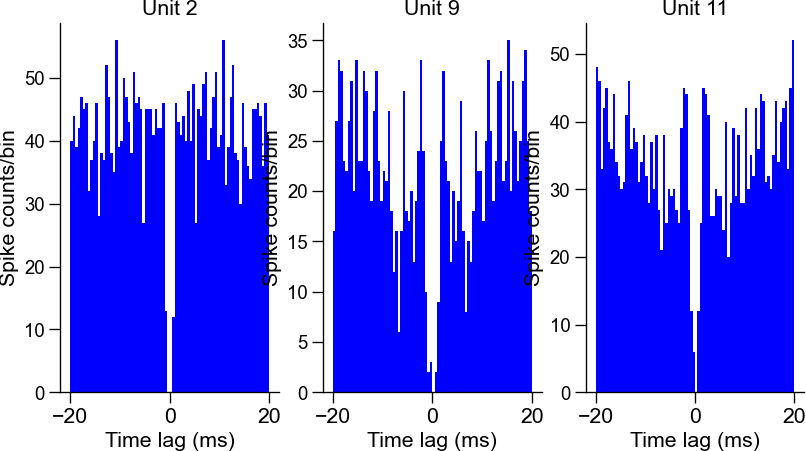

In [25]:
snc.set_bin_settings(bin_size_ms=0.5, max_lag_ms=20)
snc.plot_autocorrelogram(spike_units=[2, 9, 11], color='blue', figsize=(10,5))

## Cross-correlograms
----

Visualize cross-correlograms between pairs.

Bin size and time lag can be changed by re-setting the bins. However, for improved visualizations and reporting a smaller bin size and time lag is recommended.

In [13]:
snc.spike_unit_labels()

[np.int32(2),
 np.int32(9),
 np.int32(10),
 np.int32(11),
 np.int32(13),
 np.int32(20),
 np.int32(24),
 np.int32(29),
 np.int32(30),
 np.int32(31),
 np.int32(32),
 np.int32(33),
 np.int32(34),
 np.int32(35),
 np.int32(8),
 np.int32(14),
 np.int32(18),
 np.int32(19),
 np.int32(21),
 np.int32(23),
 np.int32(27),
 np.int32(28)]

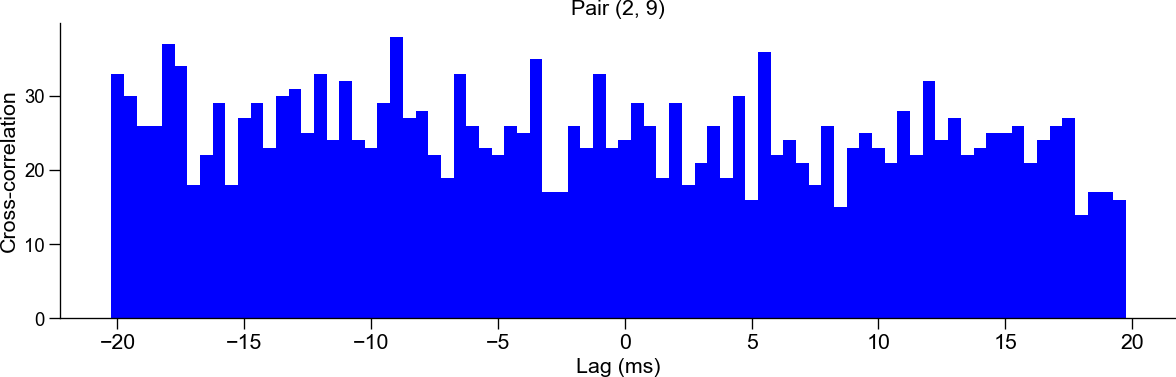

In [26]:
spike_pairs = [(2, 9)]
snc.plot_crosscorrelogram(spike_pairs=spike_pairs, figsize=(15, 4))

Find all possible pairs.

In [17]:
# get all possible pairs
spike_units = snc.spike_unit_labels()
all_spike_pairs = [(i, j) for i in spike_units for j in spike_units if i != j]

print(f'Total number of spike pairs: {len(all_spike_pairs)}')

Total number of spike pairs: 462


## Compute monosynaptic connections 
----

Compute excitatory and inhibitory monosynaptic connections between spike trains. 

This analysis was based on the following reference by Najafi et al., [here](https://www.sciencedirect.com/science/article/pii/S0896627319308487). This protocol was based on data and experimental analyses provided in the following [here](https://www.cell.com/cell-reports/fulltext/S2211-1247(23)01487-0?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2211124723014870%3Fshowall%3Dtrue).

> **computational strength calculations notes**

> First, compute synaptic strength for a set of neuron IDs. If a given unit consistently fires after a second unit, indicated by a peak in the CCG, there is high chance that these cells are functionally linked either directly through an excitatory synaptic connection or indirectly through a third neuron providing a common input.

> To compute synaptic strength, the firing of a single unit in a pair was jittered across a number of iterations (num_iterations) within a time range (jitter_range_ms). 
These were used to calculate a confidence interval (CI) between 1% and 99%. If the real CCG peak passed the 99% CI, the corresponding functional connection would be considered
significant and not random.

> A z-score was then performed using the following equation:

> ```Z = x_real - mean_jitter / std_jitter```

Inspect the output synaptic strength data.

Note that the output contains the following keys: 
1. ccg bins
2. ccg counts (from original spike trains)
3. ccg counts (post jitter)
4. synaptic strength
5. high confidence interval (99%), calculated on jittered ccg
6. low confidence interval (1%), calculation on jittered ccg
7. ccg counts (within jitter range window)
8. low confidence interal (1%), within jitter range window
9. high confidence interal (99%), within jitter range window

In [18]:
synaptic_strength_data = snc.synaptic_strength(spike_pairs=all_spike_pairs, num_iterations=1000, jitter_range_ms=10)

Check the synaptic strength data for a select pair.

This can be done automatically by plotting the original ccg, and the z-scored value.

In [19]:
# snc.plot_synaptic_strength(spike_pair = pair)

**Next, check the connection type.** 

Here, we can perform a putative detection using the z-score (synaptic strength) output.

Thresholds should be set as > 5 for excitatory-connections, or inhibitory connections as < -5 based on the reference protocol.

In [28]:
exc_connection_types = snc.monosynaptic_connection_types(threshold = 10)
exc_df = pd.DataFrame(exc_connection_types).T
exc_df

putative_exc_connection_type
2  9                     undefined
   10                    undefined
   11                    undefined
   13                    undefined
   20                    undefined
...                            ...
28 18                    undefined
   19                    undefined
   21                    undefined
   23                    undefined
   27                    undefined

[462 rows x 1 columns]

In [ ]:
# find number of exc connections 
exc_connection_idx = exc_df['putative_exc_connection_type'] != 'undefined'
exc_connection_num = sum(exc_connection_idx)
print(f'Number of excitatory connections: {exc_connection_num}')

# isolate the labels
exc_labels = exc_df[exc_connection_idx].index
print(f'Excitatory connection labels: {exc_labels}')

Number of excitatory connections: 12
Excitatory connection labels: MultiIndex([(11, 29),
            (20, 21),
            (24, 33),
            (29, 11),
            (29, 14),
            (31, 14),
            (33, 24),
            (33, 34),
            (34, 33),
            (14, 29),
            (14, 31),
            (21, 20)],
           )


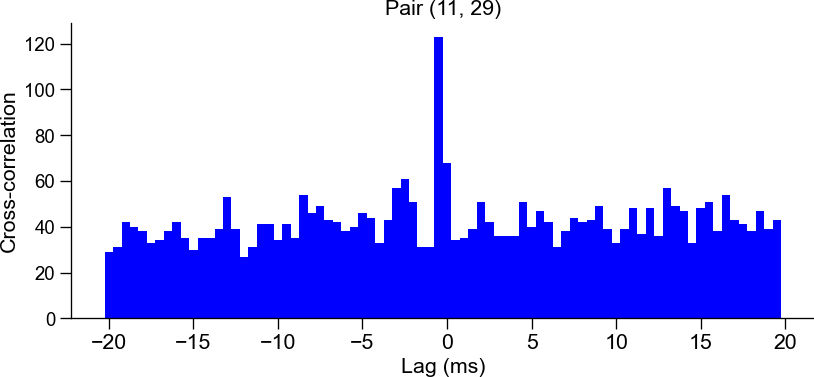

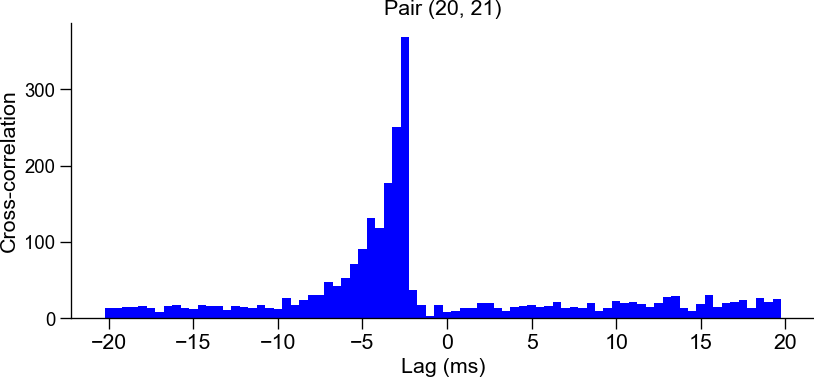

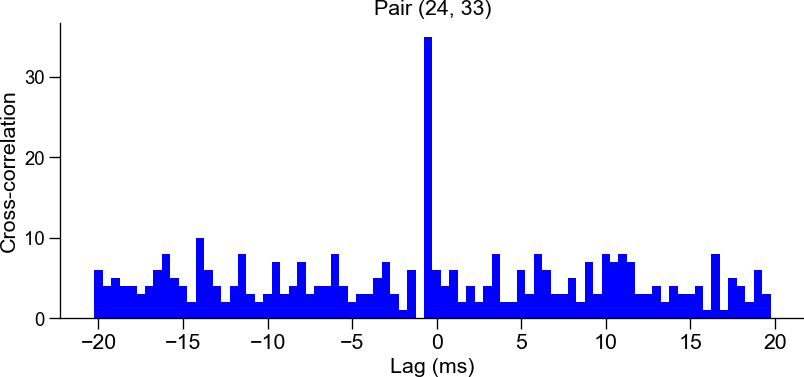

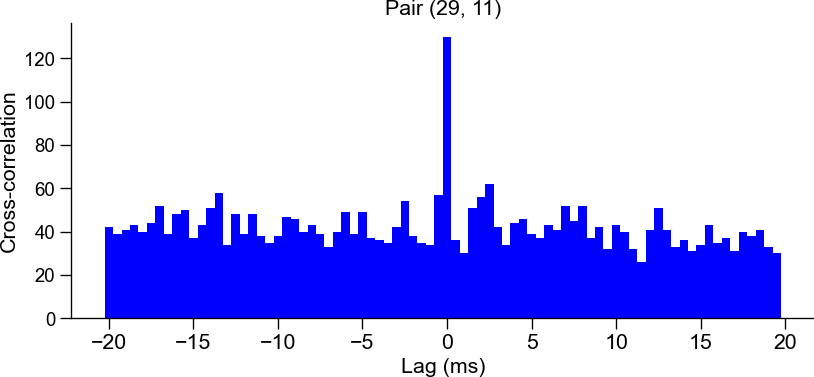

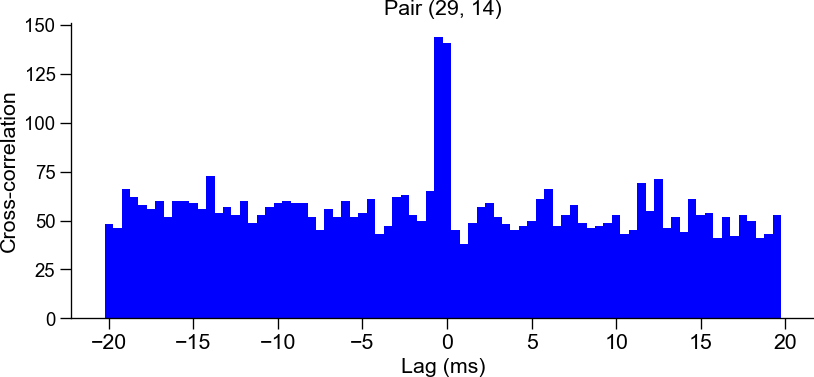

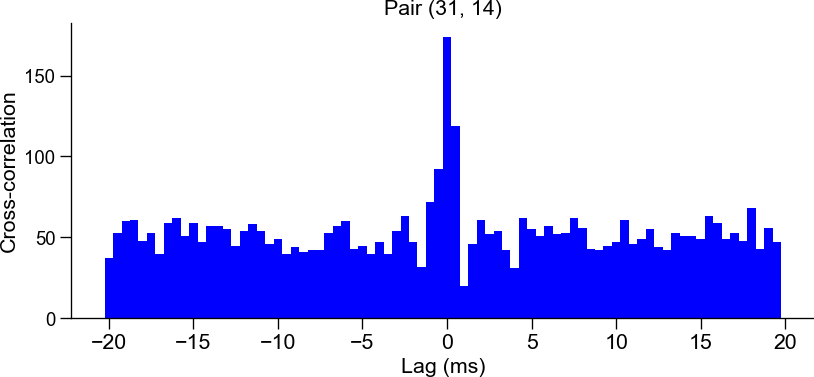

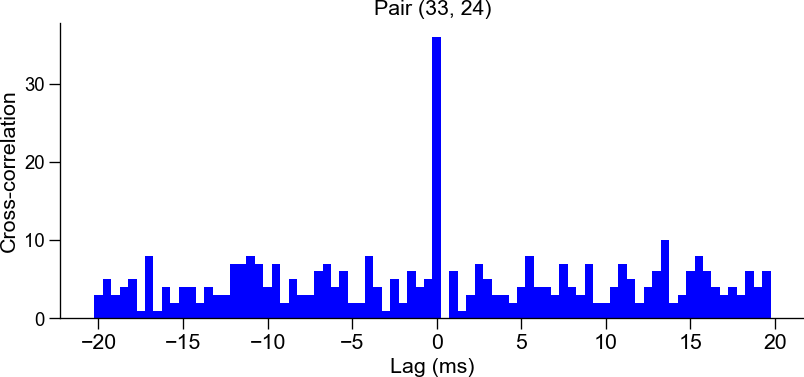

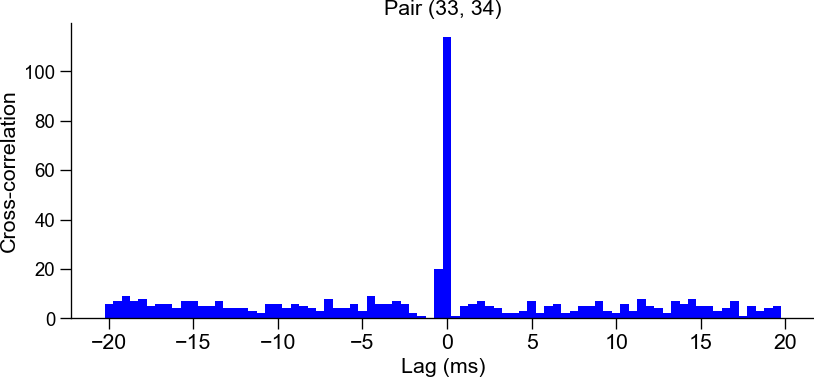

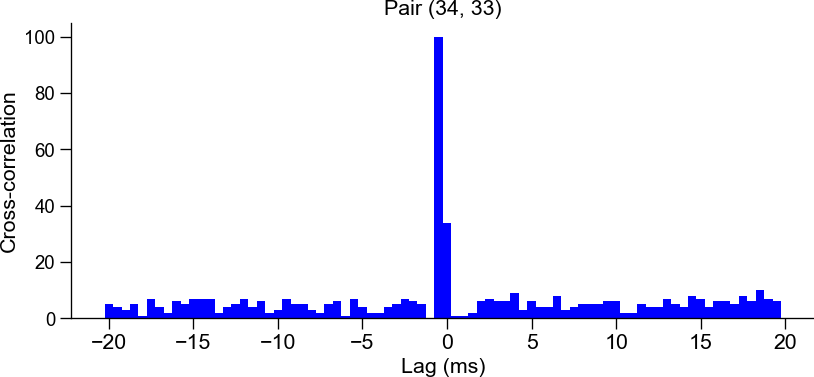

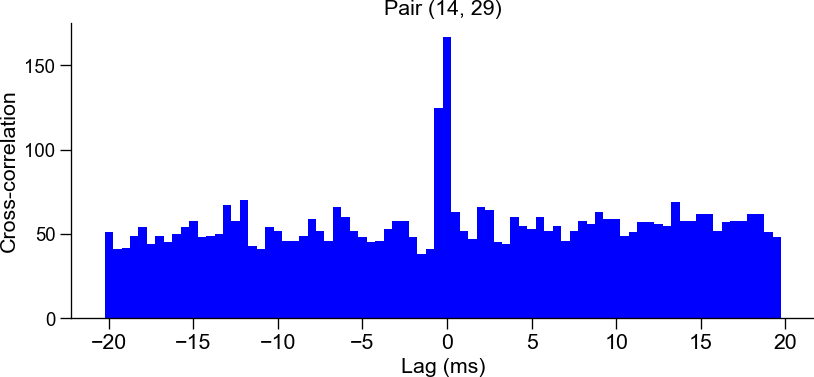

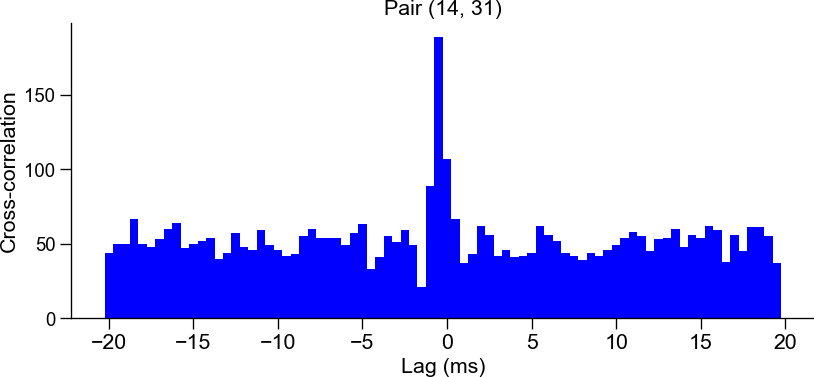

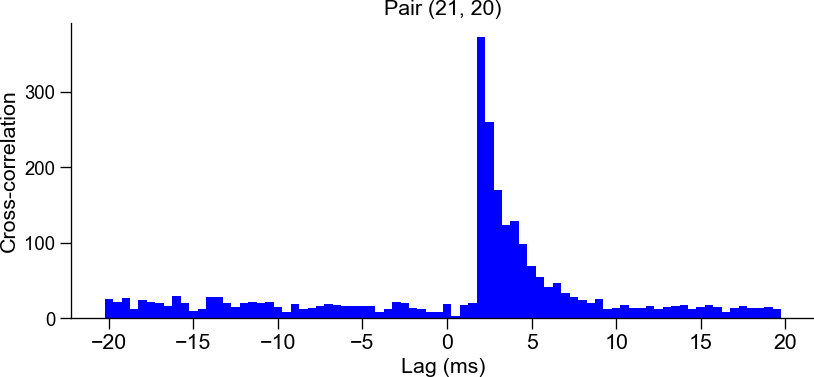

In [30]:
for exc_label in exc_labels:
    snc.plot_crosscorrelogram(spike_pairs=[exc_label], figsize=(10, 4))

Isolate synaptic connection features.

In [31]:
synaptic_features = snc.monosynaptic_connection_features()
synaptic_features_df = pd.DataFrame(synaptic_features).T
synaptic_features_df

synaptic_strength  ccg_peak_time_ms  ccg_peak_count_per_bin  \
2  9            2.146294             -23.0                    38.0   
   10           1.846787             -13.0                    39.0   
   11           2.866229               3.0                    46.0   
   13           3.375970              -4.5                    27.0   
   20           2.287426               4.5                    24.0   
...                  ...               ...                     ...   
28 18           2.078288              12.0                    43.0   
   19           1.572932               7.5                    46.0   
   21           2.582544               6.0                    35.0   
   23           1.837754             -16.0                    27.0   
   27           1.761461              19.0                    26.0   

       bootstrap_std    ccg_cv  
2  9        0.579632  0.232683  
   10       0.491164  0.169724  
   11       0.630839  0.212178  
   13       0.478055  0.349771  
   20       0.361693  0.242076  
...              ...       ...  
28 18       0.509824  0.173048  
   19       0.573862  0.183098  
   21       0.460495  0.264248  
   23       0.374011  0.210714  
   27       0.348350  0.247660  

[462 rows x 5 columns]

Isolate the monosynaptically exc-exc pairs.

If ccg peak times are < 2 ms (during refractory periods), it is likely that there is contamination in units, and the possibility of a third unit detected.

In [33]:
synaptic_features_df_pairs = synaptic_features_df.loc[exc_labels]
synaptic_features_df_pairs

synaptic_strength  ccg_peak_time_ms  ccg_peak_count_per_bin  \
11 29          12.104845              -0.5                   123.0   
20 21          47.542984              -2.5                   369.0   
24 33          13.585924              -0.5                    35.0   
29 11          13.132546               0.0                   130.0   
   14          11.605840              -0.5                   144.0   
31 14          16.398394               0.0                   174.0   
33 24          13.925330               0.0                    36.0   
   34          39.557677               0.0                   114.0   
34 33          34.568053              -0.5                   100.0   
14 29          14.741826               0.0                   167.0   
   31          18.586287              -0.5                   189.0   
21 20          49.028609               2.0                   373.0   

       bootstrap_std    ccg_cv  
11 29       1.187711  0.270485  
20 21       4.849094  1.635543  
24 33       0.349647  0.822102  
29 11       1.110894  0.275430  
   14       1.545719  0.274181  
31 14       1.604825  0.321822  
33 24       0.381874  0.834458  
   34       1.097242  1.810679  
34 33       0.969612  1.639220  
14 29       1.583478  0.288433  
   31       1.711404  0.332352  
21 20       4.926282  1.657471

CCG peak times near 0 ms are not very likely. These need to be cross-checked for contaminations.

In [53]:
exc_exc_labels = [label for label in exc_labels if label in synaptic_features_df_pairs.index]

# place all pairs into a list and no tuples
exc_exc_labels_unpacked = []
for pre, post in exc_exc_labels:
    exc_exc_labels_unpacked.append(pre)
    exc_exc_labels_unpacked.append(post)

# remove duplicates
exc_exc_labels_unpacked = list(set(exc_exc_labels_unpacked))

# isolate qc 
exc_exc_qc = qc.loc[exc_exc_labels_unpacked]
exc_exc_qc['isi_violation_proportion'] = (exc_exc_qc['isi_violations_count'] / exc_exc_qc['n_spikes'])*100
exc_exc_qc

,isi_violations_ratio,isi_violations_rate,isi_violations_count,isi_violations_of_total_spikes,presence_ratio,recording_length_sec,n_spikes,firing_rate_hz,isi_violation_proportion
33,6.757853,0.000549,1.0,0.002985,0.967742,1820.16,335.0,0.184050,0.298507
34,5.744729,0.029668,54.0,0.020225,0.967742,1820.16,2670.0,1.466904,2.022472
11,9.727250,0.023624,43.0,0.023484,0.967742,1820.16,1831.0,1.005956,2.348443
14,12.282060,0.036810,67.0,0.032940,0.967742,1820.16,2034.0,1.117484,3.294002
20,0.000000,0.000000,0.0,0.000000,0.967742,1820.16,3261.0,1.791601,0.000000
21,3.055002,0.023075,42.0,0.013007,0.967742,1820.16,3229.0,1.774020,1.300712
24,6.334023,0.015383,28.0,0.015292,0.967742,1820.16,1831.0,1.005956,1.529219
29,8.260871,0.046150,84.0,0.030248,0.967742,1820.16,2777.0,1.525690,3.024847
31,3.688135,0.048897,89.0,0.020804,0.967742,1820.16,4278.0,2.350343,2.080411


For improved robustness, remove any units which do not have isi violations < 2%.

In [54]:
exc_exc_qc_mask = exc_exc_qc['isi_violation_proportion'] < 2

# find pairs where the isi violation proportion is less than 2%
exc_exc_labels_unpacked_qc = exc_exc_qc[exc_exc_qc_mask].index

# isolate exc_exc pairs that pass qc
exc_exc_labels_qc = []
for pre, post in exc_exc_labels:
    if pre in exc_exc_labels_unpacked_qc and post in exc_exc_labels_unpacked_qc:
        exc_exc_labels_qc.append((pre, post))

exc_exc_labels_qc

[(20, 21), (24, 33), (33, 24), (21, 20)]

Remove any units which have too close of CCG counts.

In [56]:
synaptic_features_df_pairs = synaptic_features_df.loc[exc_exc_labels_qc]
synaptic_features_df_pairs

,,synaptic_strength,ccg_peak_time_ms,ccg_peak_count_per_bin,bootstrap_std,ccg_cv
20,21,47.542984,-2.5,369.0,4.849094,1.635543
24,33,13.585924,-0.5,35.0,0.349647,0.822102
33,24,13.925330,0.0,36.0,0.381874,0.834458
21,20,49.028609,2.0,373.0,4.926282,1.657471


In [61]:
exc_exc_labels_qc_final = [(21, 20)]  # tonic drive --> not monosynaptic

# remaining were removed as CCG peak time is very high, possibly not monosynaptic here, unless changs in exc responses?

## Output dataframe
----

Combine features to determine the number of monosynaptic exc-exc connections.